In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("records.csv")
df

,timestep,agent_id,x,z,collision
0,0,0,-50.339996,-9.030006,0
1,0,1,-54.372311,-12.169476,0
2,0,2,7.769201,39.750809,0
3,0,3,3.521067,38.669250,0
4,0,4,0.487762,40.736565,0
...,...,...,...,...,...
295,29,5,83.059166,-41.584232,0
296,29,6,0.000000,0.000000,0
297,29,7,-33.728832,-7.087783,0
298,29,8,0.000000,0.000000,0


In [3]:
df = df[(df["x"] != 0.0) | (df["z"] != 0.0)]
df

,timestep,agent_id,x,z,collision
0,0,0,-50.339996,-9.030006,0
1,0,1,-54.372311,-12.169476,0
2,0,2,7.769201,39.750809,0
3,0,3,3.521067,38.669250,0
4,0,4,0.487762,40.736565,0
...,...,...,...,...,...
290,29,0,-6.069178,-18.122129,0
292,29,2,18.802240,-27.977821,0
295,29,5,83.059166,-41.584232,0
297,29,7,-33.728832,-7.087783,0


In [4]:
df_ego = df[df["agent_id"] == 0]
df_ego

,timestep,agent_id,x,z,collision
0,0,0,-50.339996,-9.030006,0
10,1,0,-50.347427,-9.028520,0
20,2,0,-50.296116,-9.042307,0
30,3,0,-49.896793,-9.148985,0
40,4,0,-48.168446,-9.608172,0
50,5,0,-41.753773,-11.310220,0
60,6,0,-34.347336,-13.274665,0
70,7,0,-32.451160,-13.778963,0
80,8,0,-32.450600,-13.779150,0
90,9,0,-32.450600,-13.779150,0


In [5]:
df_npc = df[df["agent_id"] != 0]
df_npc

,timestep,agent_id,x,z,collision
1,0,1,-54.372311,-12.169476,0
2,0,2,7.769201,39.750809,0
3,0,3,3.521067,38.669250,0
4,0,4,0.487762,40.736565,0
5,0,5,-6.296102,-67.103081,0
...,...,...,...,...,...
289,28,9,-1.595507,-17.093025,0
292,29,2,18.802240,-27.977821,0
295,29,5,83.059166,-41.584232,0
297,29,7,-33.728832,-7.087783,0


In [6]:
df_merged = df_npc.merge(df_ego, on="timestep", how="left", suffixes=("", "_ego"))
df_merged['distance'] = np.sqrt((df_merged.x_ego-df_merged.x)**2 + (df_merged.z_ego-df_merged.z)**2)
df_merged = df_merged[df_merged["distance"] < 20]
df_merged

,timestep,agent_id,x,z,collision,agent_id_ego,x_ego,z_ego,collision_ego,distance
0,0,1,-54.372311,-12.169476,0,0,-50.339996,-9.030006,0,5.110364
9,1,1,-52.120113,-12.767074,0,0,-50.347427,-9.028520,0,4.137536
18,2,1,-47.584209,-13.966323,0,0,-50.296116,-9.042307,0,5.621421
27,3,1,-43.195286,-15.118234,0,0,-49.896793,-9.148985,0,8.974527
36,4,1,-40.040157,-15.946424,0,0,-48.168446,-9.608172,0,10.307400
45,5,1,-37.810177,-16.531250,0,0,-41.753773,-11.310220,0,6.543020
54,6,1,-36.234047,-16.945120,0,0,-34.347336,-13.274665,0,4.126975
63,7,1,-35.120125,-17.238087,0,0,-32.451160,-13.778963,0,4.369085
72,8,1,-34.333820,-17.445580,0,0,-32.450600,-13.779150,0,4.121799
81,9,1,-33.778126,-17.592667,0,0,-32.450600,-13.779150,0,4.037974


In [7]:
df_merged["x_ref"] = df_merged["x"] - df_merged["x_ego"]
df_merged["z_ref"] = df_merged["z"] - df_merged["z_ego"]
df_merged["x_ref"] = df_merged["x_ref"] // 5
df_merged["z_ref"] = df_merged["z_ref"] // 5
df_merged

,timestep,agent_id,x,z,collision,agent_id_ego,x_ego,z_ego,collision_ego,distance,x_ref,z_ref
0,0,1,-54.372311,-12.169476,0,0,-50.339996,-9.030006,0,5.110364,-1.0,-1.0
9,1,1,-52.120113,-12.767074,0,0,-50.347427,-9.028520,0,4.137536,-1.0,-1.0
18,2,1,-47.584209,-13.966323,0,0,-50.296116,-9.042307,0,5.621421,0.0,-1.0
27,3,1,-43.195286,-15.118234,0,0,-49.896793,-9.148985,0,8.974527,1.0,-2.0
36,4,1,-40.040157,-15.946424,0,0,-48.168446,-9.608172,0,10.307400,1.0,-2.0
45,5,1,-37.810177,-16.531250,0,0,-41.753773,-11.310220,0,6.543020,0.0,-2.0
54,6,1,-36.234047,-16.945120,0,0,-34.347336,-13.274665,0,4.126975,-1.0,-1.0
63,7,1,-35.120125,-17.238087,0,0,-32.451160,-13.778963,0,4.369085,-1.0,-1.0
72,8,1,-34.333820,-17.445580,0,0,-32.450600,-13.779150,0,4.121799,-1.0,-1.0
81,9,1,-33.778126,-17.592667,0,0,-32.450600,-13.779150,0,4.037974,-1.0,-1.0


In [8]:
df_merged[df_merged["timestep"] == 1]

,timestep,agent_id,x,z,collision,agent_id_ego,x_ego,z_ego,collision_ego,distance,x_ref,z_ref
9,1,1,-52.120113,-12.767074,0,0,-50.347427,-9.02852,0,4.137536,-1.0,-1.0


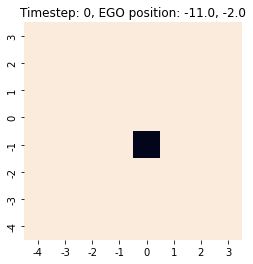

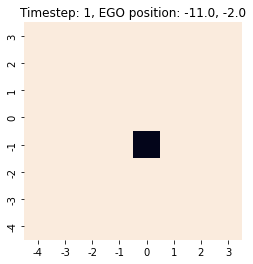

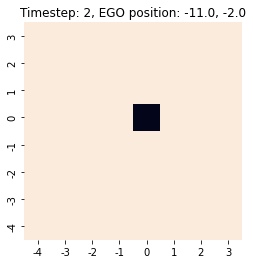

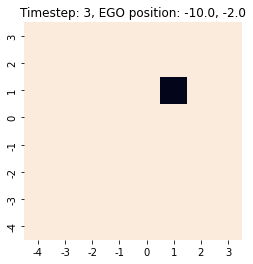

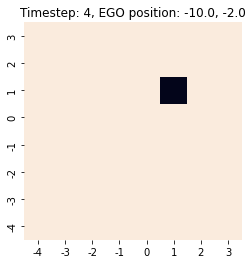

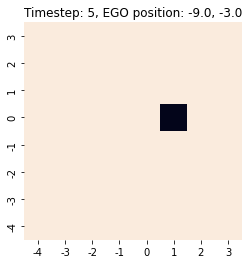

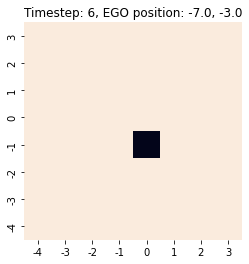

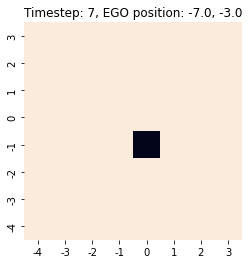

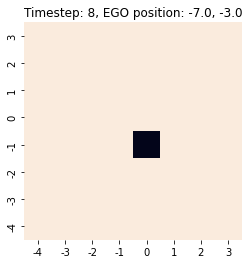

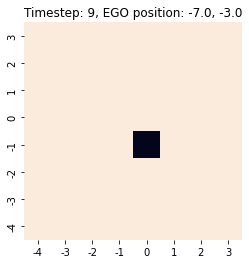

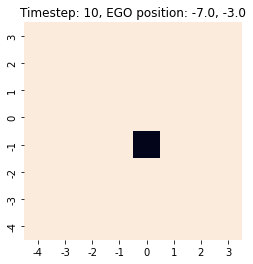

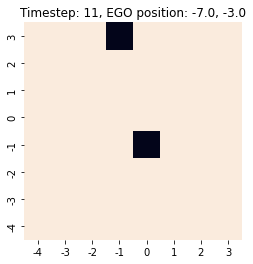

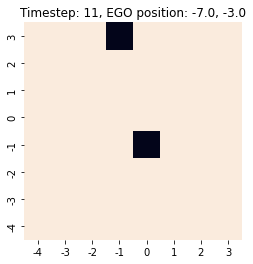

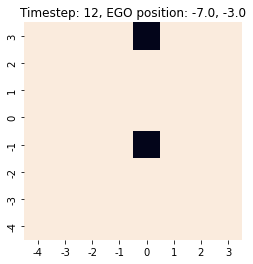

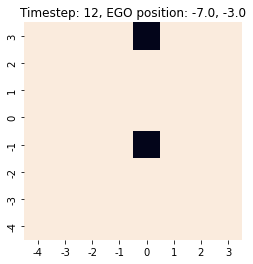

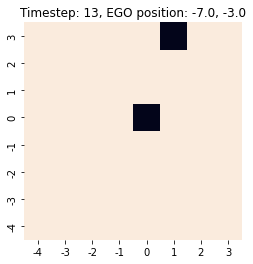

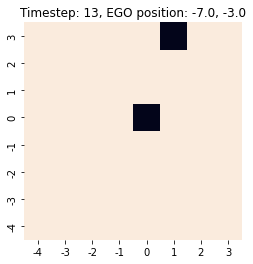

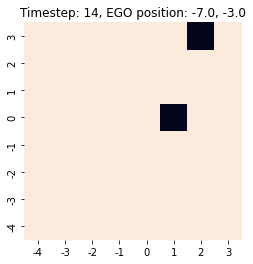

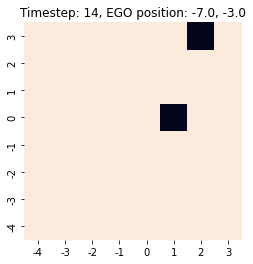

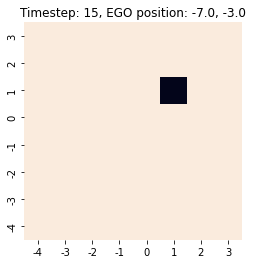

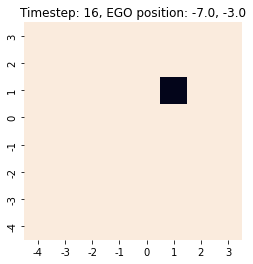

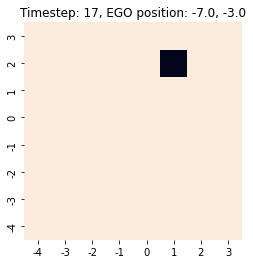

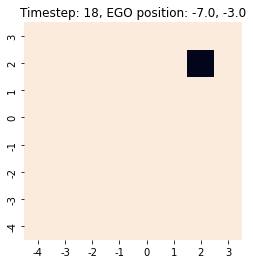

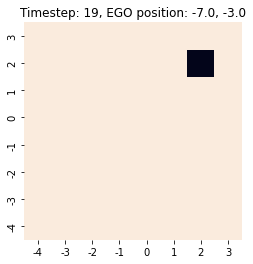

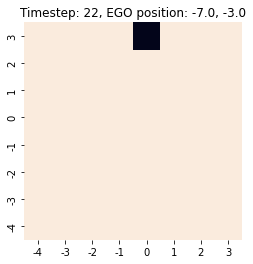

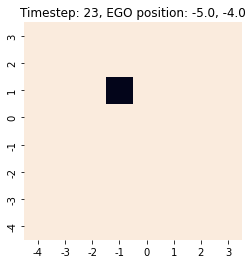

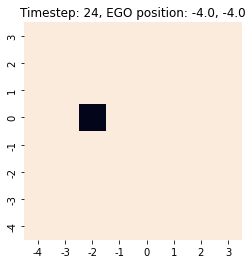

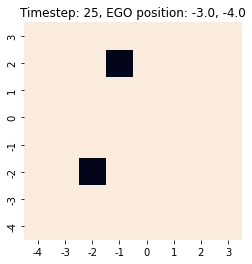

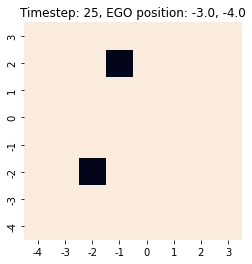

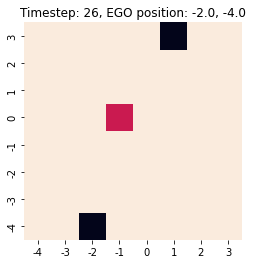

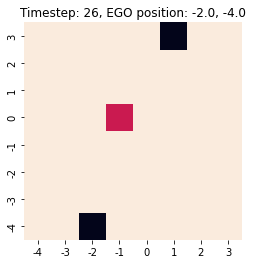

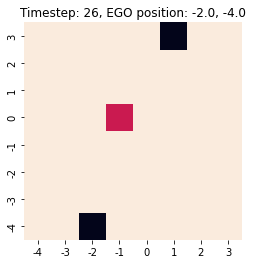

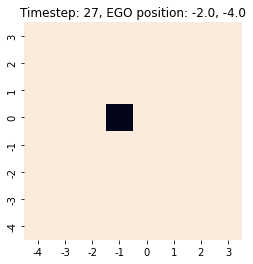

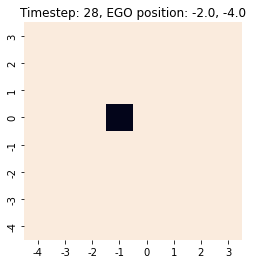

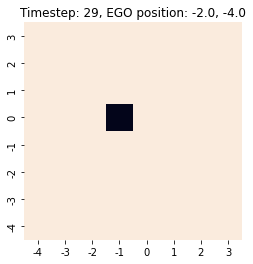

In [22]:
import matplotlib.pyplot as plt

x_axis_ticks = [i-4 for i in range(8)]
y_axis_ticks = x_axis_ticks[::-1]

for timestep in sorted(list(df_merged["timestep"])):
    a = np.zeros(shape=(8,8))
    for i, row in df_merged[df_merged["timestep"] == timestep].iterrows():
        if row["collision"] == 1:
            a[3-int(row["x_ref"])][3-int(row["z_ref"])] = 0.5
        else:
            a[3-int(row["x_ref"])][3-int(row["z_ref"])] = 1
        # a[3-int(row["z_ref"])][3-int(row["x_ref"])] = 1
    ax = sns.heatmap(a, cmap="rocket_r", cbar=False, square=True)
    # df_plot = df_merged[df_merged["timestep"] == timestep]
    # df_plot["value"] = 1
    # df_plot = df_plot.pivot('x_ref', 'z_ref', 'value')
    # ax = sns.heatmap(df_plot, cmap="rocket_r", cbar=False)
    # ax.invert_yaxis()
    ax.set_title(f"Timestep: {int(row['timestep'])}, EGO position: {row['x_ego'] // 5}, {row['z_ego'] // 5}")
    ax.set_xticklabels(axis_ticks)
    ax.set_yticklabels(y_axis_ticks)
    # ax.set(xlabel='common xlabel', ylabel='common ylabel')
    plt.show()
